In [1]:
import os
os.chdir('..')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [6]:
data_path = Path().cwd() / 'data'; data_path

PosixPath('/Users/uwaisiqbal/Code Repositories/RASM2019/data')

In [9]:
mask_path = data_path / 'task1_masks'

In [8]:
train_image_files = [file for file in (data_path / 'train').iterdir() if file.suffix == '.tif']; len(train_image_files)

20

In [12]:
def get_path_to_mask(filename):
    return mask_path / f'{filename}_mask.png'

## Perform some data augmentation to increase sample size of dataset

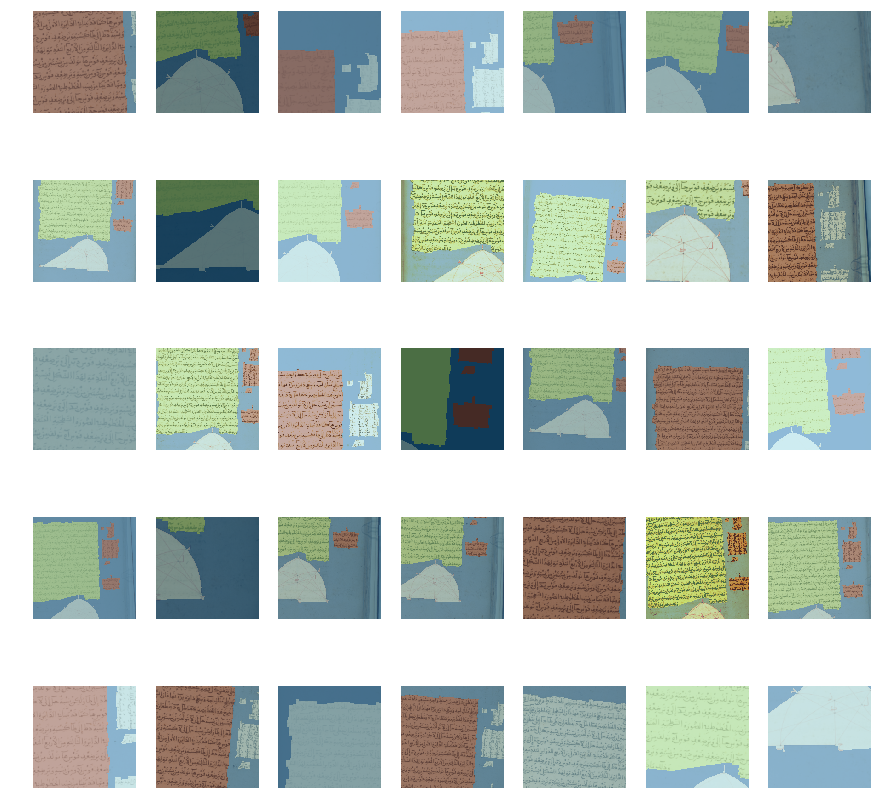

In [20]:
tfms = get_transforms(do_flip=False, max_rotate=5, max_zoom=3.0, max_lighting=0.5, max_warp=None, p_affine=1.0)
_, axs = plt.subplots(5, 7, figsize=(15,15))
for ax in axs.flatten():
    img = open_image(data_path / 'train' / 'Add MS 7474_0043.tif')
    mask = open_mask(get_path_to_mask('Add MS 7474_0043'))
    img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=224)
    mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

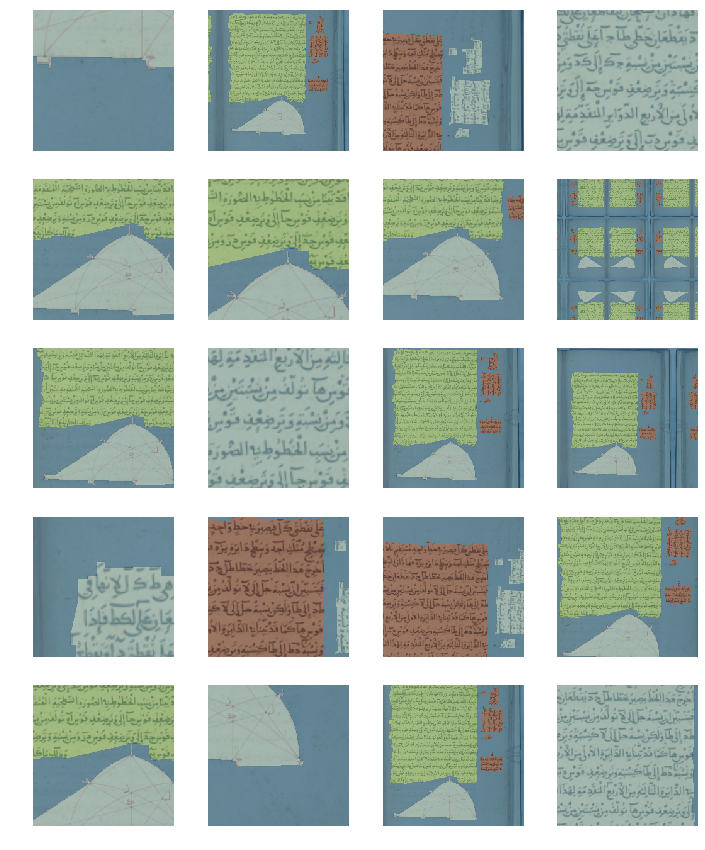

In [18]:
# tfms = get_transforms(do_flip=False, max_rotate=None, max_zoom=3.0, max_lighting=0.5, max_warp=None)
tfms = zoom_crop(scale=(1., 5), do_rand=True)
_, axs = plt.subplots(5, 4, figsize=(12,15))
for ax in axs.flatten():
    img = open_image(data_path / 'train' / 'Add MS 7474_0043.tif')
    mask = open_mask(get_path_to_mask('Add MS 7474_0043'))
    img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=224)
    mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

## Try running some augmentation and saving it to images

In [22]:
image_file = train_image_files[0]; image_file, image_file.stem

(PosixPath('/Users/uwaisiqbal/Code Repositories/RASM2019/data/train/Add MS 7474_0013.tif'),
 'Add MS 7474_0013')

In [23]:
def save_mask(mask, fn:PathOrStr):
    "Save the image to `fn`."
    x = image2np(mask.data).astype(np.uint8)
    PIL.Image.fromarray(x).save(fn)

In [24]:
data_path

PosixPath('/Users/uwaisiqbal/Code Repositories/RASM2019/data')

In [46]:
size = 224
tfms = get_transforms(do_flip=False, max_rotate=5, max_zoom=3.0, max_lighting=0.5, max_warp=None, p_affine=1.0)
n = 5
file_name = image_file.stem
img = open_image(image_file)
mask = open_mask(get_path_to_mask(file_name))
for i in range(n):
    print(i)
    aug_img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=img.size)
    aug_mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=mask.size)
    aug_img.save(data_path / 'train' / f'gen_{i}_{file_name}.tif')
    save_mask(aug_mask, data_path / 'task1_masks' / f'gen_{i}_{file_name}_mask.png')

0
1
2
3
4


In [41]:
def show_image_with_mask(file_name):
    img = open_image(data_path / 'train' /  f'{file_name}.tif')
    mask = open_mask(data_path / 'task1_masks' /  f'{file_name}_mask.png')
    img.show(y=mask, figsize=(10,9))

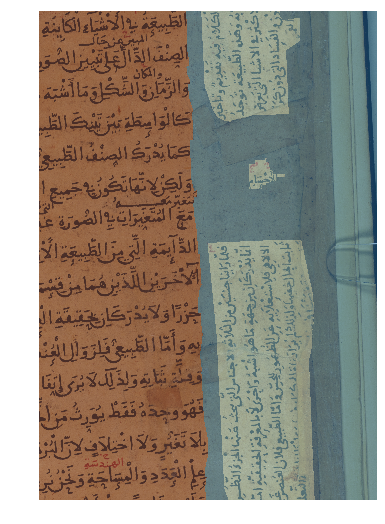

In [51]:
show_image_with_mask('gen_4_Add MS 7474_0013')

In [52]:
def generate_augmented_data(file_name, n):
    print(file_name)
    tfms = get_transforms(do_flip=False, max_rotate=5, max_zoom=3.0, max_lighting=0.5, max_warp=None, p_affine=1.0)
    img = open_image(image_file)
    mask = open_mask(get_path_to_mask(file_name))
    for i in range(n):
        print(i)
        aug_img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=img.size)
        aug_mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=mask.size)
        aug_img.save(data_path / 'train' / f'gen_{i}_{file_name}.tif')
        save_mask(aug_mask, data_path / 'task1_masks' / f'gen_{i}_{file_name}_mask.png')
        
# Keep the original files in a seperate folder because this list will include generated data as well
for image_file in train_image_files:
    generate_augmented_data(image_file.stem, 5)

Add MS 7474_0013
0
1
2
3
4
Add MS 23494_0031
0
1
2
3
4
Add MS 7474_0028
0
1
2
3
4
Or 13006_0172
0
1
2
3
4
Delhi Arabic 1901_0155
0
1
2
3
4
Delhi Arabic 1901_0154
0
1
2
3
4
Delhi Arabic 1901_0036


FileNotFoundError: [Errno 2] No such file or directory: '/Users/uwaisiqbal/Code Repositories/RASM2019/data/task1_masks/Delhi Arabic 1901_0036_mask.png'

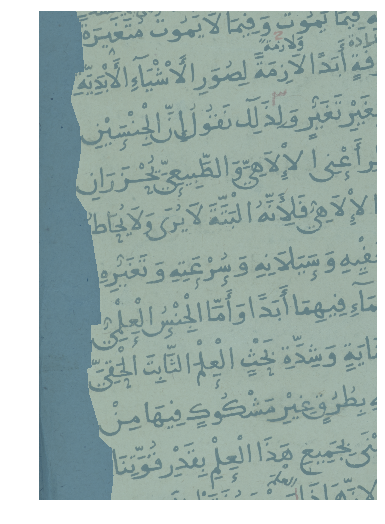

In [53]:
show_image_with_mask('gen_4_Add MS 7474_0013')

In [54]:
show_image_with_mask('gen_5_Add MS 7474_0013')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/uwaisiqbal/Code Repositories/RASM2019/data/train/gen_5_Add MS 7474_0013.tif'

In [ ]:
# Dir structure
# data
# --> raw_data/
# ---> --> xml_files
# ---> ---> image_files
# ---> train_images - original + gen data
# ---> task1_masks - original + gen masks